## Sport Injuries Data Exploration

### imports

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

date_cols = [2, 19, 20, 26, 29, 30]
injuries = pd.read_csv('data/injuries_cleaned.csv', parse_dates=date_cols)


### Dataframe Exploration

In [2]:
injuries_df = injuries.copy()
print(injuries_df.shape)
print(injuries_df.info())
injuries_df.head()

(6540, 47)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6540 entries, 0 to 6539
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   PlayerName                  6540 non-null   object        
 1   PlayerId                    6540 non-null   object        
 2   PlayerDOB                   6540 non-null   datetime64[ns]
 3   Height                      6540 non-null   float64       
 4   Weight                      6540 non-null   float64       
 5   Positions                   6540 non-null   object        
 6   GroupPosition               6540 non-null   object        
 7   DraftPick                   5864 non-null   float64       
 8   IsActive                    6540 non-null   bool          
 9   FirstSeason                 6540 non-null   int64         
 10  LastSeason                  6540 non-null   int64         
 11  SeasonsPlayed               6540 non-null   i

,PlayerName,PlayerId,PlayerDOB,Height,Weight,Positions,GroupPosition,DraftPick,IsActive,FirstSeason,...,cbc,out_for_season,out_indefinitely,surgery,sprain,broken,bruise,strain,bone,main_body_part
0,Steve Blake,blakest01,1980-02-26,75.0,172.0,Point Guard,G,38.0,False,2004,...,False,False,True,True,False,False,False,False,False,abdomen
1,Alan Anderson,anderal01,1982-10-16,78.0,220.0,"Small Forward, Shooting Guard",F,NaN,False,2006,...,False,False,False,False,False,False,False,False,False,abdomen
2,Arron Afflalo,afflaar01,1985-10-15,77.0,210.0,"Small Forward, Shooting Guard",G,27.0,False,2008,...,False,False,False,False,False,False,False,True,False,abdomen
3,Bobby Simmons,simmobo01,1980-06-02,79.0,210.0,"Power Forward, Small Forward, Shooting Guard",F,41.0,False,2002,...,False,False,False,False,False,False,False,True,False,abdomen
4,D.J. Augustine,augusdj01,1987-11-10,71.0,183.0,Point Guard,G,9.0,True,2009,...,False,False,True,False,False,False,False,True,False,abdomen


In [3]:
injuries_df['DaysInjured'].describe()


count    6540.000000
mean       48.853976
std       101.482648
min         1.000000
25%         2.000000
50%         6.000000
75%        28.000000
max      1766.000000
Name: DaysInjured, dtype: float64

In [ ]:
### Number of Injuries by Categories

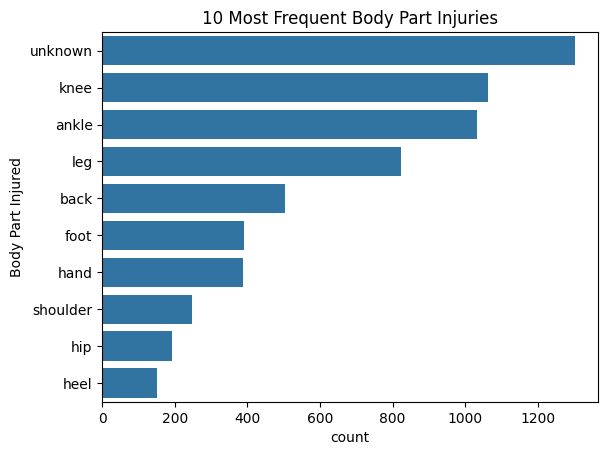

In [16]:
def injuries_dist_cat(col):
    count_df = injuries_df[col].value_counts().head(10)
    sns.barplot(x=count_df, y=count_df.index)


injuries_dist_cat('main_body_part')
plt.title('10 Most Frequent Body Part Injuries')
plt.ylabel('Body Part Injured')
plt.show()


### Numeric Ditributions

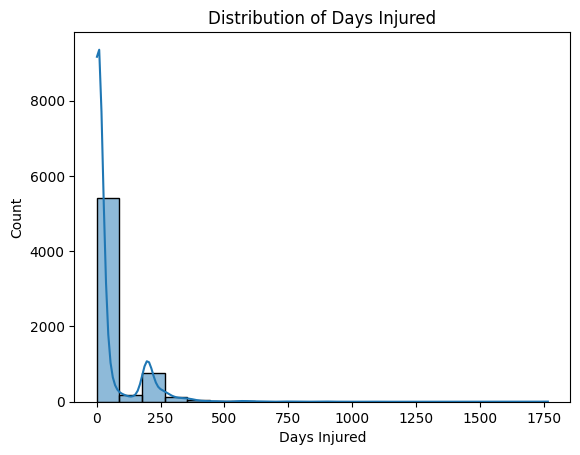

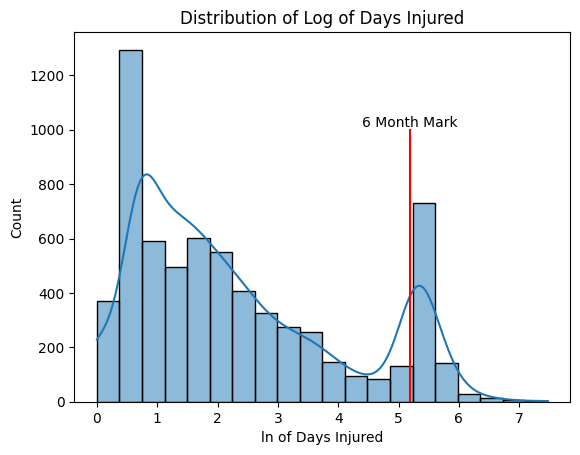

In [9]:

sns.histplot(data=injuries_df, x='DaysInjured', bins=20, kde=True)
plt.title('Distribution of Days Injured')
plt.xlabel('Days Injured')
plt.ylabel('Count')
plt.show() 

sns.histplot(data=injuries_df, x='log_days_injured', bins=20, kde=True)
t = np.log(30*6)
plt.plot([t, t], [0, 1000], color='#FF0000')
plt.text(t, 1010, '6 Month Mark', ha='center')
plt.title('Distribution of Log of Days Injured')
plt.xlabel('ln of Days Injured')
plt.ylabel('Count')
plt.show() 


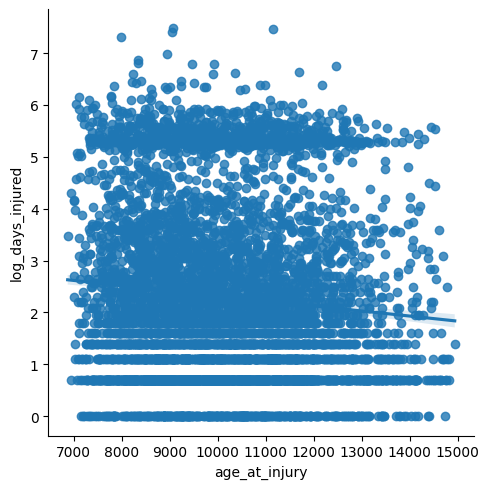

In [6]:
# sns.lmplot(data=injuries_df, x='age_at_injury', y='log_days_injured')


In [ ]:
order = injuries_df.groupby('BodyPartInjured').log_days_injured.median().sort_values(ascending=False).index

top_5 = order[0:]
plt.figure(figsize=(6, 4))
sns.boxplot(data=injuries_df[injuries_df['BodyPartInjured'].isin(top_5)], y='BodyPartInjured', x='log_days_injured', order=top_5)
plt.show()


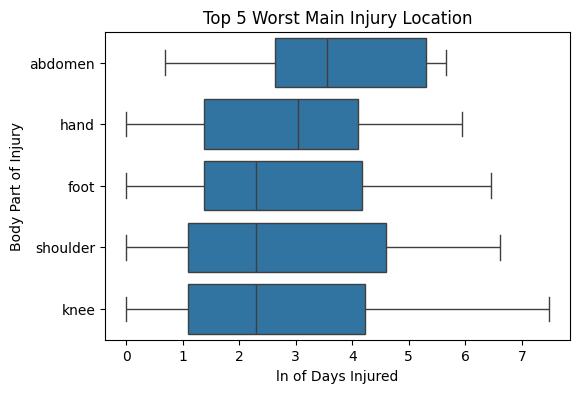

In [8]:
order = injuries_df.groupby('main_body_part').log_days_injured.median().sort_values(ascending=False).index

top_5 = order[0:5]
plt.figure(figsize=(6, 4))
sns.boxplot(data=injuries_df[injuries_df['main_body_part'].isin(top_5)], y='main_body_part', x='log_days_injured', order=top_5)
plt.title('Top 5 Worst Main Injury Location')
plt.xlabel('ln of Days Injured')
plt.ylabel('Body Part of Injury')
plt.show()

In [ ]:
part_counts = injuries_df['BodyPartInjured'].value_counts()
high_count = part_counts.index[part_counts >= 250]
high_count_df = injuries_df[injuries_df['BodyPartInjured'].isin(high_count)]
order = high_count_df.groupby('BodyPartInjured').remaining_days.median().sort_values(ascending=True).index

plt.figure(figsize=(5, 15))
sns.boxplot(data=high_count_df, y='BodyPartInjured', x='remaining_days', order=order)
plt.show()
injuries_df['BodyPartInjured'].value_counts()

In [ ]:
sns.boxplot(data=injuries[injuries['broken'] | injuries['bruise']], x='log_days_injured', hue='broken')
plt.title('Bruise Better than Broken')
plt.xlabel('ln Days Injured')
plt.legend(title='', labels=['Bruised', 'Broken'])
plt.show()

## Correlation 

In [9]:
injuries_df.columns

Index(['PlayerName', 'PlayerId', 'PlayerDOB', 'Height', 'Weight', 'Positions',
       'GroupPosition', 'DraftPick', 'IsActive', 'FirstSeason', 'LastSeason',
       'SeasonsPlayed', 'TeamNameFull', 'TeamLocation', 'TeamName', 'Season',
       'SeasonStartYear', 'SeasonEndYear', 'TeamMadePlayoffs', 'DateInjured',
       'DateReturned', 'GamesMissed', 'DaysInjured', 'DaysBetweenGames',
       'BodyPartInjured', 'InjuryDescription', 'LastTransactionDate',
       'LastTransactionDescription', 'LastTransactionType', 'approx_first_day',
       'approx_last_day', 'remaining_days', 'log_days_injured',
       'age_at_injury', 'bmi', 'dnp', 'dtd', 'cbc', 'out_for_season',
       'out_indefinitely', 'surgery', 'sprain', 'broken', 'bruise', 'strain',
       'bone', 'main_body_part'],
      dtype='object')

<Axes: >

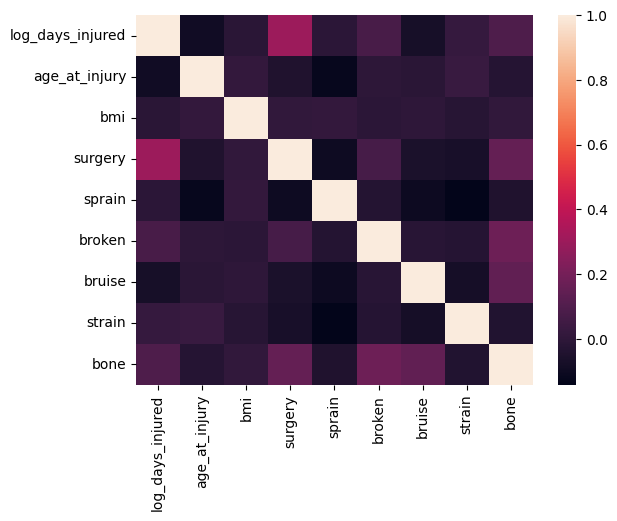

In [20]:
cols = ['log_days_injured', 'age_at_injury', 'bmi', 'surgery', 'sprain', 'broken', 'bruise', 'strain',
       'bone']

corr = pd.get_dummies(injuries_df[cols]).corr(method='pearson')

sns.heatmap(corr, annot=False)
